Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Над проектом нужно будет еще немного поработать.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* Все ошибки исправлены и теперь проект может быть зачтен.
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

1. Загрузите данные и выполните их ресемплирование по одному часу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit # Кросс-валидатор временных рядов
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression as LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
taxi_df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

display(taxi_df.head())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [3]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно.
</div>

Данные подготовлены для выполнения задания.
Проведем проверку как себя поведут данные при ресемплировании по разным периодам с частотой 1 час:

In [4]:
calendar.prmonth(2018, 3)

     March 2018
Mo Tu We Th Fr Sa Su
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30 31


- день. Зададим 5 марта
- неделя. С 5-11 марта, включительно
- месяц. С 1-31 марта

,num_orders
datetime,
2018-03-05 00:00:00,86
2018-03-05 01:00:00,176
2018-03-05 02:00:00,32
2018-03-05 03:00:00,51
2018-03-05 04:00:00,34


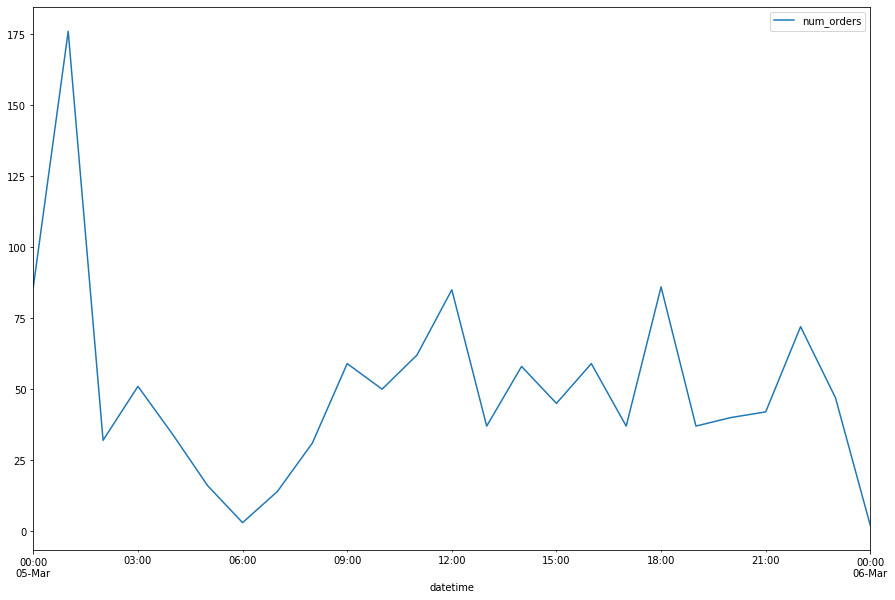

In [5]:
day_resample = taxi_df['2018-03-05 00:00:00':'2018-03-06 00:00:00'].resample('1H').sum()

display(day_resample.head())
figsize = (15,10)
day_resample.plot(figsize=figsize)

,num_orders
datetime,
2018-03-05 00:00:00,86
2018-03-05 01:00:00,176
2018-03-05 02:00:00,32
2018-03-05 03:00:00,51
2018-03-05 04:00:00,34


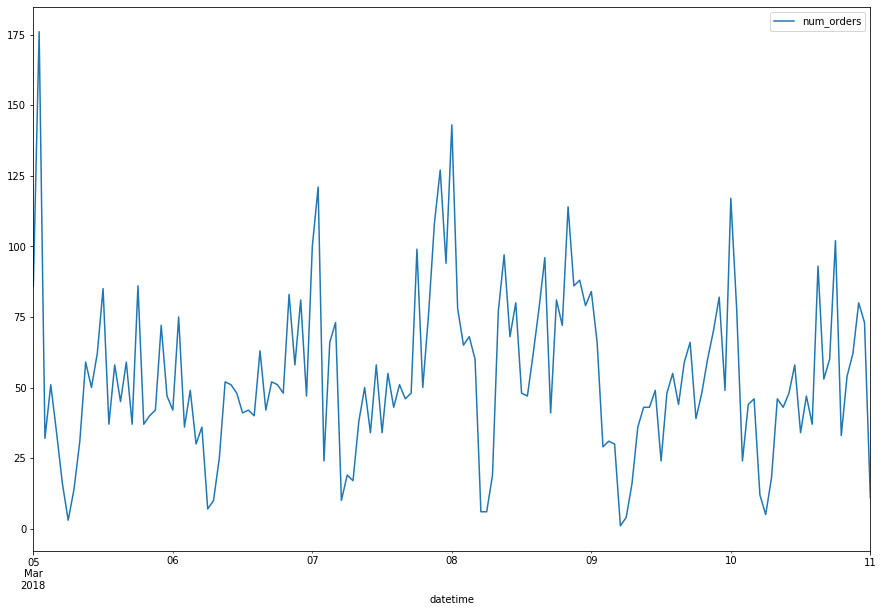

In [6]:
week_resample = taxi_df['2018-03-05 00:00:00':'2018-03-11 00:00:00'].resample('1H').sum()
display(week_resample.head())
figsize = (15,10)
week_resample.plot(figsize=figsize)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


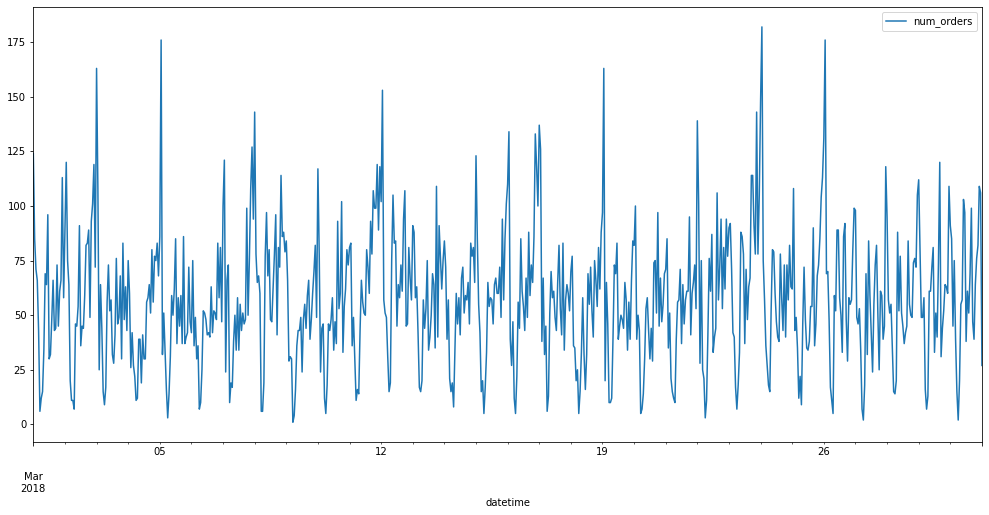

In [7]:
month_resample = taxi_df['2018-03-01 00:00:00':'2018-03-31 00:00:00'].resample('1H').sum()

display(month_resample.head())
figsize = (17,8)
month_resample.plot(figsize=figsize)

### Вывод

На графиках видно ресемплирование в частотой 1 час:

- В течении суток видно что большое кол-во вывоза такси приходит на дневное время суток, а точнее в утренее время (начало рабочего дня) и в вечернее время (в конце рабочего дня).

- В течении всей недели пиком вызовов являются дневное время суток. И даже в выходные дни кол-во вызовов не сокращается.

- Анализ всего месяца показал что заказы сильно колеблются. И следует провести более детальный анализ с помощью обучения.


Создаем выборки для того чтобы провести скользящее среднее

In [8]:
taxi_df = taxi_df.resample("1H").sum()

taxi_copy = taxi_df.copy()
taxi_copy["rolling_mean"] = taxi_copy["num_orders"].rolling(2).mean()
print(taxi_copy.head())

                     num_orders  rolling_mean
datetime                                     
2018-03-01 00:00:00         124           NaN
2018-03-01 01:00:00          85         104.5
2018-03-01 02:00:00          71          78.0
2018-03-01 03:00:00          66          68.5
2018-03-01 04:00:00          43          54.5



Добавили новое значение, скользящее среднее. 

Данные подготовлены к анализу

<div class="alert alert-block alert-success">
<b>Успех:</b> Ресемплинг был сделан правильно.
</div>

## Анализ

Проверим есть ли влияния сезонности на данные

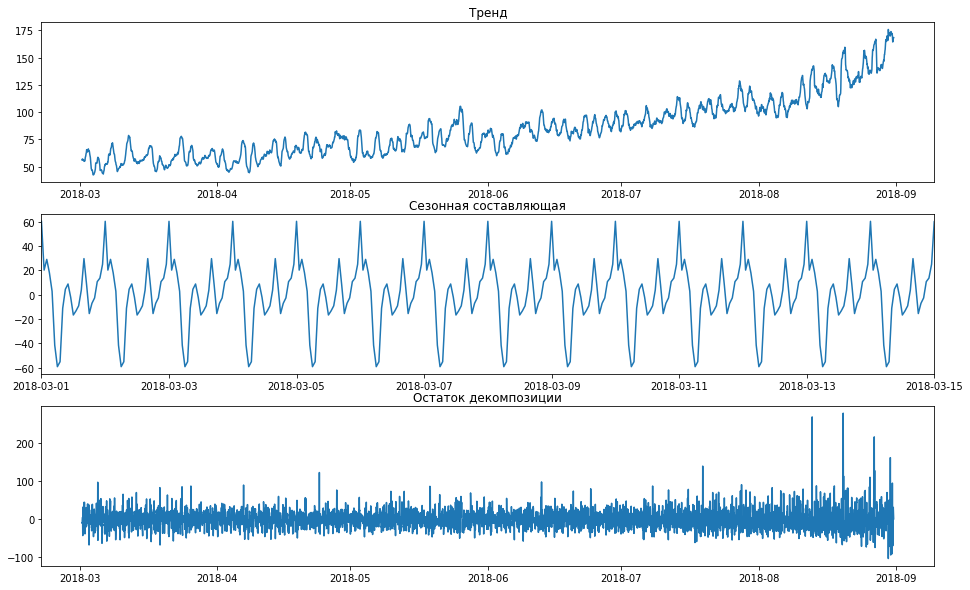

In [9]:
decomposed = seasonal_decompose(taxi_copy["num_orders"])

fig, axs = plt.subplots(3, figsize=(16,10), sharex=False)
axs[0].plot(decomposed.trend)
axs[0].set_title("Тренд")

axs[1].plot(decomposed.seasonal)
axs[1].set_title("Сезонная составляющая")
axs[1].set_xlim(('2018-03-01','2018-03-15'))

axs[2].plot(decomposed.resid)
axs[2].set_title("Остаток декомпозиции")

plt.show()

Разложила временной ряд на три составляющие: тренд, сезонность и остаток 
 
 - На графике Тренд видно увеличение заказов такси в аэропорту.
 - График сезонной составляющей показывает результат за 15 дней
 - График 'Остаток декомпозиции' показывает циклическую состовляющую


<div class="alert alert-block alert-success">
<b>Успех:</b> В целом, декомпозиция проведена верно.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Однако, я бы визуализировал сезонность на более коротком интервале.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Выполнила. Взяла интервал 15 дней
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

In [10]:
def make_features(data, max_lag, rolling_mean_size, differentiate=False):
    data_copy = data.copy(deep=True)
    data_copy['year'] = data.index.year
    data_copy['month'] = data.index.month
    data_copy['day'] = data.index.day
    data_copy['dayofweek'] = data.index.dayofweek

    
    for lag in range(1, max_lag + 1):
        data_copy['lag_{}'.format(lag)] = data_copy['num_orders'].shift(lag)

    data_copy['rolling_mean'] = data_copy['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data_copy
    

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Попробуй выбрать эти параметры исходя из графика сезонности.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Если я правильно поняла, то изменила наименование датафрейма во время создания методом Copy().
    
Вычисления параметров max_lag, rolling_mean_size  и функцию make_features опустила после графика сезонности.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Да, вот теперь все отлично!
</div>

Высчитываем признаки для горизонта прогнозирования в один шаг.

In [11]:
max_lag_taxi = seasonal_decompose(taxi_copy['2018-03-03':'2018-03-15'])
max_lag = 24


<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Отрицательный max_lag не имеет смысла. На графике сезонности можно увидеть дневную сезонность, значит max_lag лучше взять равным 24.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения(ревью 2):</b> +
</div>

In [12]:
rolling_size = {}
for rolling_mean_size in range(2,49):
    data = taxi_copy['2018-03-03':'2018-03-15'].copy()
    data['rolling_mean'] = data['num_orders'].rolling(rolling_mean_size).mean()
    data.dropna(inplace=True)
    index = data.index
    num_orders = data['num_orders']
    rolling_mean = data['rolling_mean']
    RMSE = mean_squared_error(num_orders,rolling_mean)**0.5
    rolling_size[rolling_mean_size] = RMSE

rolling_mean_size = min(rolling_size.keys(), key=(lambda x: rolling_size[x]))
print(rolling_mean_size)

2


In [13]:
taxi_copy = make_features(taxi_copy,max_lag,rolling_mean_size)

<div class="alert alert-block alert-warning">
<b>Изменения:</b> присвоила новые изменения к датасету 
</div>

Подготовка данных для обучения

In [14]:
taxi_copy = taxi_copy.dropna()
train, test = train_test_split(taxi_copy, test_size=0.1, random_state=12345, shuffle=False)

(features_train,features_test) = (train.drop('num_orders',axis = 1), test.drop('num_orders',axis = 1))
(target_train, target_test) = (train['num_orders'], test['num_orders'])

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано верно.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> А зачем ты изменила блок выше? Теперь он некорректен, так как ты убрала параметр shuffle=False.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения(ревью 2):</b> ок, вернула
</div>

## Обучение

Кросс-валидатор временных рядов

In [15]:
def time_series_rmse(model, data, target_column, n_splits, max_train_size):
    tscv = TimeSeriesSplit(n_splits = n_splits, max_train_size = max_train_size)
    RMSE = 0.0
    for train_index, test_index in tscv.split(data):
        train = data.iloc[train_index]
        test = data.iloc[test_index]
        
        train_features = train.drop(target_column, axis=1)
        train_target = train[target_column]
        test_features = test.drop(target_column, axis=1)
        test_target = test[target_column]
        model.fit(train_features, train_target)
        RMSE += mean_squared_error(test_target, model.predict(test_features)) ** 0.5
    return RMSE / n_splits

max_train_size = (train.shape[0] * 4 //5)
cv_splits = 3

<div class="alert alert-block alert-success">
    <b>Успех:</b> Радует, что был использован подходящий под данные сплиттер.
</div>

<b>LinearRegression</b>

In [16]:
%%time

model = LinearRegression()
RMSE_LR = time_series_rmse(model=model, data=train, target_column='num_orders', n_splits=cv_splits, max_train_size=max_train_size)
print('RMSE LinearRegression =', RMSE_LR)

RMSE LinearRegression = 27.53268397617158
CPU times: user 235 ms, sys: 232 ms, total: 468 ms
Wall time: 473 ms


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, напечатай train, тогда ты обнаружишь ошибку. Специально не буду подробно расписывать почему так произошло, чтобы ты это исследовала сама. 
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Распечатала и увидела что не попали столбцы из функции make_features. 
</div>

<b>DecisionTreeRegressor</b>

In [17]:
%%time

model = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21)]
hyperparams = [{'criterion':['mse'],  'max_depth':max_depth_list, 'random_state':[12345]}]

clf = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)
best_params_DTR = clf.best_params_
print(best_params_DTR)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))


{'criterion': 'mse', 'max_depth': 4, 'random_state': 12345}
31.702581 for {'criterion': 'mse', 'max_depth': 2, 'random_state': 12345}
29.416397 for {'criterion': 'mse', 'max_depth': 3, 'random_state': 12345}
29.295767 for {'criterion': 'mse', 'max_depth': 4, 'random_state': 12345}
30.508497 for {'criterion': 'mse', 'max_depth': 5, 'random_state': 12345}
30.516535 for {'criterion': 'mse', 'max_depth': 6, 'random_state': 12345}
31.245660 for {'criterion': 'mse', 'max_depth': 7, 'random_state': 12345}
33.354024 for {'criterion': 'mse', 'max_depth': 8, 'random_state': 12345}
34.429236 for {'criterion': 'mse', 'max_depth': 9, 'random_state': 12345}
34.642061 for {'criterion': 'mse', 'max_depth': 10, 'random_state': 12345}
34.882976 for {'criterion': 'mse', 'max_depth': 11, 'random_state': 12345}
35.704606 for {'criterion': 'mse', 'max_depth': 12, 'random_state': 12345}
35.861103 for {'criterion': 'mse', 'max_depth': 13, 'random_state': 12345}
36.878479 for {'criterion': 'mse', 'max_depth': 

In [18]:
%%time

model = DecisionTreeRegressor()
model.set_params(**best_params_DTR)
RMSE_DTR = time_series_rmse(model=model, data=train, target_column='num_orders', n_splits=cv_splits, max_train_size=max_train_size)
print('RMSE DecisionTreeRegressor =', RMSE_DTR)

RMSE DecisionTreeRegressor = 31.87237199673776
CPU times: user 68.3 ms, sys: 0 ns, total: 68.3 ms
Wall time: 70.5 ms


<b>CatBoostRegressor</b>

In [19]:
%%time

model = CatBoostRegressor() 
hyperparams = [{'learning_rate':[x/10 for x in range(1, 6)], 'random_state':[12345], 'verbose':[False]}]

 
clf = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)
best_params_CBR = clf.best_params_
print(best_params_CBR)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))

{'learning_rate': 0.1, 'random_state': 12345, 'verbose': False}
25.598003 for {'learning_rate': 0.1, 'random_state': 12345, 'verbose': False}
26.049409 for {'learning_rate': 0.2, 'random_state': 12345, 'verbose': False}
26.590991 for {'learning_rate': 0.3, 'random_state': 12345, 'verbose': False}
27.161581 for {'learning_rate': 0.4, 'random_state': 12345, 'verbose': False}
27.737070 for {'learning_rate': 0.5, 'random_state': 12345, 'verbose': False}
CPU times: user 6min 24s, sys: 54.9 s, total: 7min 19s
Wall time: 7min 37s


In [20]:
%%time

model = CatBoostRegressor()
model.set_params(**best_params_CBR)

RMSE_CBR = time_series_rmse(model=model, data=train,  target_column='num_orders',  n_splits=cv_splits, max_train_size=max_train_size)
print('RMSE CatBoostRegressor =', RMSE_CBR)

RMSE CatBoostRegressor = 26.56460840906224
CPU times: user 54.6 s, sys: 8.44 s, total: 1min 3s
Wall time: 1min 6s


<b>Регрессия LGBMRegressor</b>

In [21]:
%%time

model = LGBMRegressor() 
hyperparams = [{'learning_rate':[x/10 for x in range(1, 6)], 'random_state':[12345]}]

 
clf = GridSearchCV(model, hyperparams, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)
 
best_params_LGBMR = clf.best_params_
print(best_params_LGBMR)
 
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))


{'learning_rate': 0.1, 'random_state': 12345}
25.538189 for {'learning_rate': 0.1, 'random_state': 12345}
26.382092 for {'learning_rate': 0.2, 'random_state': 12345}
26.727831 for {'learning_rate': 0.3, 'random_state': 12345}
28.173264 for {'learning_rate': 0.4, 'random_state': 12345}
28.395405 for {'learning_rate': 0.5, 'random_state': 12345}
CPU times: user 41.1 s, sys: 0 ns, total: 41.1 s
Wall time: 41.7 s


In [22]:
%%time

model = LGBMRegressor()
model.set_params(**best_params_LGBMR)
 
RMSE_LGBMR = time_series_rmse(model=model,  data=train, target_column='num_orders', n_splits=cv_splits, max_train_size=max_train_size)
print('RMSE LGBMRegressor =', RMSE_LGBMR)

RMSE LGBMRegressor = 27.48571947038968
CPU times: user 4.25 s, sys: 0 ns, total: 4.25 s
Wall time: 4.3 s


<div class="alert alert-block alert-success">
<b>Успех:</b> Подбор параметров был сделан правильно, молодец!
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Теперь подбор параметров реализован отлично!
</div>

## Тестирование

Обучение и тестирование с лучшими параметрами

In [23]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)
predict = model.predict(features_test)
RMSE_LR_test = mean_squared_error(target_test, predict) ** 0.5

CPU times: user 148 ms, sys: 73.8 ms, total: 222 ms
Wall time: 284 ms


In [24]:
%%time

model = DecisionTreeRegressor()
model.set_params(**best_params_DTR)
model.fit(features_train, target_train)
predict = model.predict(features_test)
RMSE_DTR_test = mean_squared_error(target_test, predict) ** 0.5

CPU times: user 50.2 ms, sys: 17.3 ms, total: 67.6 ms
Wall time: 91.8 ms


In [25]:
%%time

model = CatBoostRegressor()
model.set_params(**best_params_CBR)
model.fit(features_train, target_train)
predict = model.predict(features_test)
RMSE_CBR_test = mean_squared_error(target_test, predict) ** 0.5

CPU times: user 26.2 s, sys: 3.45 s, total: 29.7 s
Wall time: 30.9 s


In [26]:
%%time

model = LGBMRegressor()
model.set_params(**best_params_LGBMR)
model.fit(features_train, target_train)
predict = model.predict(features_test)
RMSE_LGBMR_test = mean_squared_error(target_test, predict) ** 0.5

CPU times: user 1.58 s, sys: 14.7 ms, total: 1.59 s
Wall time: 1.61 s


Результаты:

In [27]:
index = ['LinearRegression', 'DecisionTreeRegressor', 'CatBoostRegressor', 'LGBMRegressor']
data = {'RMSE обучающая выборка':[RMSE_LR, RMSE_DTR, RMSE_CBR, RMSE_LGBMR],
        'RMSE тестовой выборке':[RMSE_LR_test, RMSE_DTR_test, RMSE_CBR_test, RMSE_LGBMR_test]}

stat = pd.DataFrame(data=data, index=index)
for i, r in stat.iterrows():
    stat.loc[i,'Рейтинг RMSE'] = stat['RMSE обучающая выборка'].min() /r['RMSE обучающая выборка']
    
display(stat)

,RMSE обучающая выборка,RMSE тестовой выборке,Рейтинг RMSE
LinearRegression,27.532684,45.542447,0.964839
DecisionTreeRegressor,31.872372,55.851242,0.833468
CatBoostRegressor,26.564608,40.505711,1.000000
LGBMRegressor,27.485719,41.417754,0.966488


<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование проведено корректно. Собрать все результаты в одной таблице – отличная идея!
</div>

### Вывод

Главное требование задания было выявить такую модель обучения при котором бы значение метрики RMSE на тестовой выборке должны быть не больше 48. 
Под это требование подходят все выбранные модели: LinearRegression, DecisionTreeRegressor, CatBoostRegressor, LGBMRegressor.

Поэтому для того чтобы построить модель для предсказания "Привлечь больше водителей в период пиковой нагрузки" выбираем ту, которая имеет самое меньшее значение, это модель с обучением CatBoostRegressor, RMSE тестовой выборке равная 40.505711. 



<div class="alert alert-block alert-success">
<b>Успех:</b> Радует, что проект завершается выводом.
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48